<a href="https://colab.research.google.com/github/SantoshJambagi2004/Machine_Learning/blob/main/1BM22CS244_Lab_3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

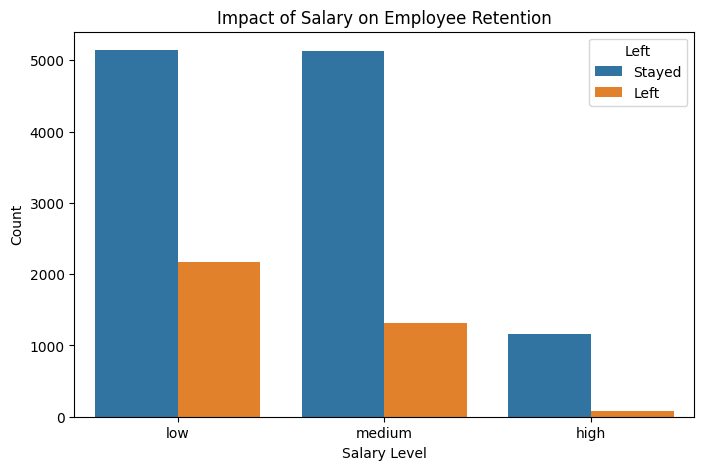

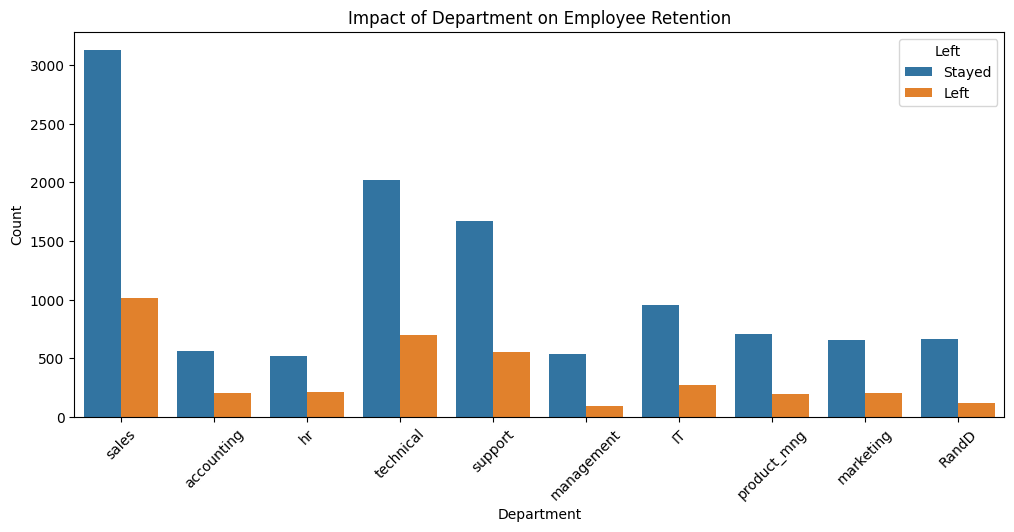

Model Accuracy: 78.13%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "/content/HR_comma_sep.csv"
df = pd.read_csv(file_path)

# Data Visualization - Salary vs Retention
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="salary", hue="left", order=["low", "medium", "high"])
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

# Data Visualization - Department vs Retention
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="Department", hue="left")
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

# Encode categorical variables
df_encoded = df.copy()
df_encoded["salary"] = df_encoded["salary"].map({"low": 0, "medium": 1, "high": 2})
df_encoded = pd.get_dummies(df_encoded, columns=["Department"], drop_first=True)

# Select relevant features
features = [
    "satisfaction_level", "last_evaluation", "number_project",
    "average_montly_hours", "time_spend_company", "Work_accident",
    "promotion_last_5years", "salary"
]
X = df_encoded[features]
y = df_encoded["left"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64
Model Accuracy: 95.24%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


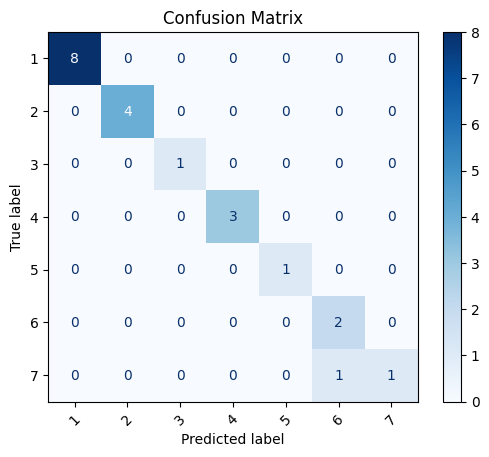

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
zoo_file_path = "/content/zoo-data.csv"
zoo_df = pd.read_csv(zoo_file_path)

# Check for missing values
print(zoo_df.isnull().sum())

# Define features and target variable
X = zoo_df.drop(columns=["class_type", "animal_name"], errors='ignore')  # Drop unnecessary columns
y = zoo_df["class_type"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build logistic regression model
model = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict and evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()